In [146]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d
from matplotlib import style

#Asignacion 3
Valentia Alfaro Rivera 2211702

Nathalia Alexandra Perez 2200023

Cristian Fernando Avila Navarro  2190729


In [147]:
datos = pd.read_excel('Datos a3.xlsx',usecols=("B:E"))
#creación de vectores:

m = np.array(datos['masas']) 
x = np.array(datos['x'])
y = np.array(datos['y'])
z = np.array(datos['z'])

# Punto 1.a.1

In [148]:
#En este caso la función será f(r) = m por lo que no será necesario definir una sola función para las masas

#EN EL PLANO XY Y EN EL ESPACIO XYZ
tensor0 = 0
for i in range(len(x)):
  tensor0 += m[i]
print("La masa total del sistema es: ",tensor0)

La masa total del sistema es:  4627.0


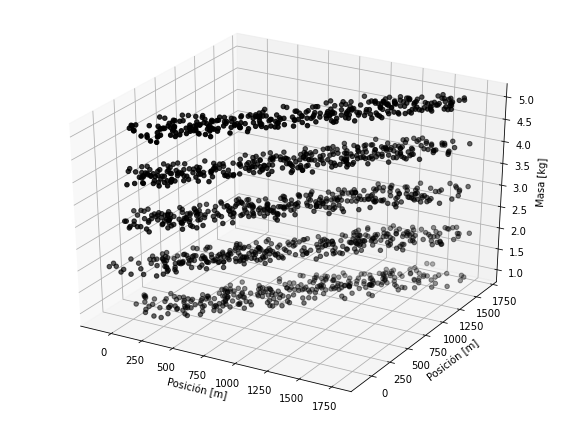

In [149]:
fig=plt.figure(figsize=(8,6))
axes = plt.axes(projection="3d")
axes.scatter3D(x,y,m,color="k")
#axes.set_title("3d Sactter plot in Matplotlib",fontsize=14,fontweight="bold")
axes.set_xlabel('Posición [m]')
axes.set_ylabel('Posición [m]')
axes.set_zlabel('Masa [kg]')
plt.tight_layout()
plt.show()

# Punto 1.a.2.

In [150]:
#Centro de masa respecto a:
rbarra = [np.mean(x),np.mean(y),np.mean(z)]
print(rbarra,"\n")

cmx, cmy, cmz = 0, 0, 0
for i in range(len(m)):
  cmx += m[i]*(x[i] - rbarra[0])
  cmy += m[i]*(y[i] - rbarra[1])
  cmz += m[i]*(z[i] - rbarra[2])

#EN EL PLANO XY
tensor1 = [cmx,cmy]
print("El centro de masa del sistema está en: ",tensor1)

#EN EL ESPACIO XYZ
TENSOR1 = [cmx,cmy,cmz]
print("El centro de masa del sistema está en: ",TENSOR1)

[821.9739073711677, 775.870189171559, 15.06327462491846] 

El centro de masa del sistema está en:  [17773.73059360568, 4850.634703204753]
El centro de masa del sistema está en:  [17773.73059360568, 4850.634703204753, 2036.2283105021615]


In [151]:
cmxx, cmyy, cmzz = 0, 0, 0
for i in range(len(m)):
  cmxx += m[i]*x[i]
  cmyy += m[i]*y[i]
  cmzz += m[i]*z[i]

centro = [cmxx/tensor0,cmyy/tensor0]
print(centro)

[825.8152150421439, 776.9185217203371]


# Punto 1.a.3

In [152]:
#Creación del vector posición:
r = []

for i in range(len(x)):
  posicion = []
  posicion.append(x[i])
  posicion.append(y[i])
  posicion.append(z[i])
  r.append(posicion)

#Creación de la matriz tensor:
e1, e2, e3, e4, e5, e6, e7, e8, e9 = 0, 0, 0, 0, 0, 0, 0, 0, 0
for i in range(len(x)):
  e1 += m[i]*(r[i][0]-rbarra[0])*(r[i][0]-rbarra[0])
  e2 += m[i]*(r[i][0]-rbarra[0])*(r[i][1]-rbarra[1])
  e3 += m[i]*(r[i][0]-rbarra[0])*(r[i][2]-rbarra[2])

  e4 += m[i]*(r[i][1]-rbarra[1])*(r[i][0]-rbarra[0])
  e5 += m[i]*(r[i][1]-rbarra[1])*(r[i][1]-rbarra[1])
  e6 += m[i]*(r[i][1]-rbarra[1])*(r[i][2]-rbarra[2])

  e7 += m[i]*(r[i][2]-rbarra[2])*(r[i][0]-rbarra[0])
  e8 += m[i]*(r[i][2]-rbarra[2])*(r[i][1]-rbarra[1])
  e9 += m[i]*(r[i][2]-rbarra[2])*(r[i][2]-rbarra[2])  

#EN EL PLANO XY
tensor2 = [[],[]]
tensor2[0].append(e1)
tensor2[0].append(e2)
tensor2[1].append(e4)
tensor2[1].append(e5)
print("El tensor momento de inercia es: ", tensor2)

#EN EL ESPACIO XYZ
TENSOR2 = [[],[],[]]
TENSOR2[0].append(e1)
TENSOR2[0].append(e2)
TENSOR2[0].append(e3)
TENSOR2[1].append(e4)
TENSOR2[1].append(e5)
TENSOR2[1].append(e6)
TENSOR2[2].append(e7)
TENSOR2[2].append(e8)
TENSOR2[2].append(e9)
print("El tensor momento de inercia es: ", TENSOR2)


El tensor momento de inercia es:  [[958603863.3765317, 911766544.1163656], [911766544.1163656, 963665233.3609312]]
El tensor momento de inercia es:  [[958603863.3765317, 911766544.1163656, -7134226.856404165], [911766544.1163656, 963665233.3609312, -1927462.592672016], [-7134226.856404165, -1927462.5926720141, 101844216.79181606]]


In [153]:
#Extra: Creación de la matriz tensor:
e1, e2, e3, e4 = 0, 0, 0, 0
for i in range(len(x)):
  e1 += m[i]*r[i][0]*r[i][0]
  e2 += m[i]*r[i][0]*r[i][1]
  e3 += m[i]*r[i][1]*r[i][0]
  e4 += m[i]*r[i][1]*r[i][1]
  

#EN EL PLANO XY
t2 = [[],[]]
t2[0].append(e1)
t2[0].append(e2)
t2[1].append(e3)
t2[1].append(e4)
print("El tensor momento de inercia es: ", t2)


El tensor momento de inercia es:  [[4114014339.0, 3880390098.0], [3880390098.0, 3756528404.0]]


## Punto 1: valores y vectores propios

In [154]:
#EN EL PLANO XY
vectores_p = np.linalg.eig(tensor2)
print("Los valores propios son: ",vectores_p[0], "y los autovectores respectivos son: ",vectores_p[1])

#EN EL ESPACIO XYZ
VECTORES_P = np.linalg.eig(TENSOR2)
print("Los valores propios son: ",VECTORES_P[0], "y los autovectores respectivos son: ",VECTORES_P[1])


Los valores propios son:  [4.93644922e+07 1.87290460e+09] y los autovectores respectivos son:  [[-0.70808741 -0.70612479]
 [ 0.70612479 -0.70808741]]
Los valores propios son:  [1.87292775e+09 4.91061110e+07 1.02079453e+08] y los autovectores respectivos son:  [[ 0.70612535  0.70653155 -0.04690577]
 [ 0.70807762 -0.70422699  0.05186931]
 [-0.00361499  0.06983916  0.99755171]]


In [155]:
#Ejercicio extra :v

def f(dx,dy):
  if dx in x:
    indx = np.where(x == dx)
  if dy in y:
    indy = np.where(y == dy)
  p=0
  masa = m[p]
  if len(indx[0]>=indy[0]):
    for a in range(len(indx[0])):
      for b in range(len(indy[0])):
        if indy[0][b]==indx[0][a]:
          p = indy[0][b]
          return masa
        else:
          return "No hay partícula en esa posición"


In [156]:
#separación de los valores 
#la masa con un valor de 1:
b=[]
pos=[]

for i in m:
  if i==1:
    b.append(i)
pos.append(np.where(m==1))    

masas1x=[]
masas1y=[]

for i in range(len(pos[0])):
  masas1x.append(x[pos[0][i]])
  masas1y.append(y[pos[0][i]])
#---------------------------------------------------------------------------------------------------------------------------------------------------------
#la masa con un valor de 2:
ye=[]
pos2=[]

for i in m:
  if i==2:
    ye.append(i)
pos2.append(np.where(m==2))    

masas2x=[]
masas2y=[]

for i in range(len(pos2[0])):
  masas2x.append(x[pos2[0][i]])
  masas2y.append(y[pos2[0][i]])

#-------------------------------------------------------------------------------------------------------------------------------------------------------
#  la masa con un valor de 3:
r=[]
pos3=[]

for i in m:
  if i==3:
    r.append(i)
pos3.append(np.where(m==3))    

masas3x=[]
masas3y=[]

for i in range(len(pos3[0])):
  masas3x.append(x[pos3[0][i]])
  masas3y.append(y[pos3[0][i]])

#-------------------------------------------------------------------------------------------------------------------------------------------------------
#  la masa con un valor de 4:
mo=[]
pos4=[]

for i in m:
  if i==4:
    mo.append(i)
pos4.append(np.where(m==4))    

masas4x=[]
masas4y=[]

for i in range(len(pos4[0])):
  masas4x.append(x[pos4[0][i]])
  masas4y.append(y[pos4[0][i]])
  #-------------------------------------------------------------------------------------------------------------------------------------------------------
#  la masa con un valor de 5:
ci=[]
pos5=[]

for i in m:
  if i==5:
    ci.append(i)
pos5.append(np.where(m==5))    

masas5x=[]
masas5y=[]

for i in range(len(pos5[0])):
  masas5x.append(x[pos5[0][i]])
  masas5y.append(y[pos5[0][i]])

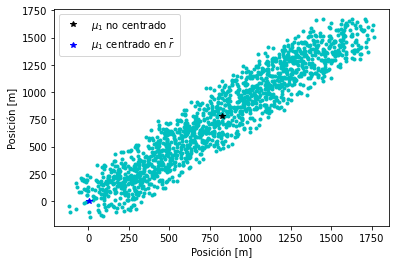

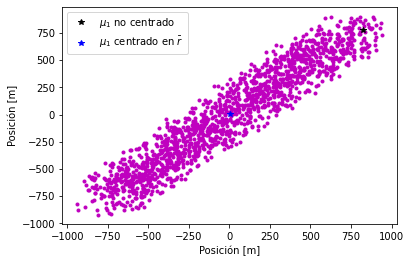

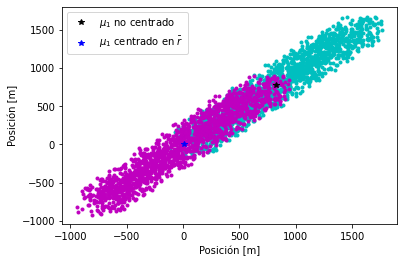

In [157]:
masasxx, masasyy = [], []
for i in range(len(x)):
  masasxx.append(x[i]-rbarra[0])
  masasyy.append(y[i]-rbarra[1])

plt.figure(1)
plt.plot(x,y,"c.")
plt.plot(825.8152150421439, 776.9185217203371,"k*",label=r'$\mu_1$ no centrado')
plt.plot(3.84130767,1.04833255,"b*", label=r'$\mu_1$ centrado en $\bar{r}$')
plt.ylabel("Posición [m]")
plt.xlabel("Posición [m]")
plt.legend()

plt.figure(2)
plt.plot(masasxx,masasyy,"m.")
plt.plot(825.8152150421439, 776.9185217203371,"k*",label=r'$\mu_1$ no centrado')
plt.plot(3.84130767,1.04833255,"b*", label=r'$\mu_1$ centrado en $\bar{r}$')
plt.ylabel("Posición [m]")
plt.xlabel("Posición [m]")
plt.legend()

plt.figure(3)
plt.plot(x,y,"c.")
plt.plot(masasxx,masasyy,"m.")
plt.plot(825.8152150421439, 776.9185217203371,"k*",label=r'$\mu_1$ no centrado')
plt.plot(3.84130767,1.04833255,"b*", label=r'$\mu_1$ centrado en $\bar{r}$')
plt.ylabel("Posición [m]")
plt.xlabel("Posición [m]")
plt.legend()

No handles with labels found to put in legend.


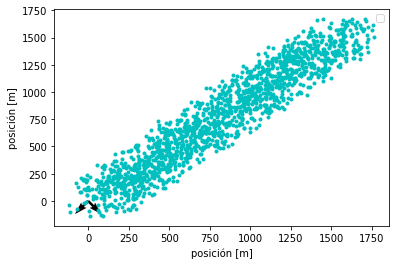

In [158]:

plt.figure(2)
plt.plot(masas1x,masas1y,"c.")
plt.plot(masas2x,masas2y,"c.")
plt.plot(masas3x,masas3y,"c.")
plt.plot(masas4x,masas4y,"c.")
plt.plot(masas5x,masas5y,"c.")
plt.quiver(-0.70808741,-0.70612479)
plt.quiver( 0.70612479, -0.70808741)
plt.ylabel("posición [m]")
plt.xlabel("posición [m]")
plt.legend()

PUNTO 2 

In [159]:
#Creación de los vectores de GDP

GDPM = pd.read_excel('GBP .xlsx','Militar',usecols='A:B')
GDPS = pd.read_excel('GBP .xlsx','Salud',usecols='A:B')
GDPE = pd.read_excel('GBP .xlsx','Educación',usecols='A:B')
GDPC = pd.read_excel('GBP .xlsx','c&t',usecols='A:B')

#porcentajes:

mili = np.array(GDPM['%'])
salu = np.array(GDPS['%'])
edu  = np.array(GDPE['%'])
ct  = np.array(GDPC['%'])

#Años:

años= np.array(GDPM['AÑO'])

In [160]:
#covarianza:

#mbar,sbar,ebary ctbar y asi son los promedios de los valores de miitar, salud, educacion y c&t

mbar,sbar,ebar,ctbar =  mili.mean(),salu.mean(),edu.mean(),ct.mean()

#matriz de covarianza:

e11 = np.sum((mili-mbar)**2)/(len(mili))
e12 = np.sum((mili-mbar)*(salu-sbar))/(len(mili))
e13 = np.sum((mili-mbar)*(edu-ebar))/(len(mili))
e14 = np.sum((mili-mbar)*(ct-ctbar))/(len(mili))

e21 = np.sum((salu-sbar)*(mili-mbar))/(len(mili))
e22 = np.sum((salu-sbar)**2)/(len(mili))
e23 = np.sum((salu-sbar)*(edu-ebar))/(len(mili))
e24 = np.sum((salu-sbar)*(ct-ctbar))/(len(mili))

e31 = np.sum((edu-ebar)*(mili-mbar))/(len(mili))
e32 = np.sum((edu-ebar)*(salu-sbar))/(len(mili))
e33 = np.sum((edu-ebar)**2)/(len(mili))
e34 = np.sum((edu-ebar)*(ct-ctbar))/(len(mili))

e41 = np.sum((ct-ctbar)*(mili-mbar))/(len(mili))
e42 = np.sum((ct-ctbar)*(salu-sbar))/(len(mili))
e43 = np.sum((ct-ctbar)**2)/(len(mili))
e44 = np.sum((ct-ctbar)*(ct-ctbar))/(len(mili))


mc = [[],
      [],
      [],
      []]

mc[0].append(e11)
mc[0].append(e12)
mc[0].append(e13)
mc[0].append(e14)

mc[1].append(e21)
mc[1].append(e22)
mc[1].append(e23)
mc[1].append(e24)

mc[2].append(e31)
mc[2].append(e32)
mc[2].append(e33)
mc[2].append(e34)

mc[3].append(e41)
mc[3].append(e42)
mc[3].append(e43)
mc[3].append(e44)

print(mc)

[[6.239496484374997e-06, 3.6479218749999976e-06, -5.442024218749996e-06, 2.7170624999999994e-07], [3.6479218749999976e-06, 2.3045624999999993e-05, -6.027468749999998e-06, 1.8653749999999995e-06], [-5.442024218749996e-06, -6.027468749999998e-06, 8.445748437499996e-06, -2.714812499999999e-07], [2.7170624999999994e-07, 1.8653749999999995e-06, 2.4219999999999993e-07, 2.4219999999999993e-07]]


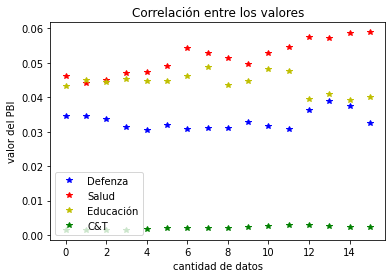

In [161]:
#correlación:
plt.plot(mili,'b*', label='Defenza')
plt.plot(salu,'r*',label='Salud')
plt.plot(edu,'y*',label='Educación')
plt.plot(ct,'g*',label='C&T')
plt.xlabel('cantidad de datos')
plt.ylabel('valor del PBI')
plt.title('Correlación entre los valores')
plt.legend()
plt.show()

#falta encontrar la correlacion y la matriz.

In [162]:
#Correlación: denotada como r

r11 = np.sum((mili-mbar)*(mili-mbar))/(np.sum(np.sqrt((mili-mbar)**2)*(mili-mbar)**2))
r12 = np.sum((mili-mbar)*(salu-sbar))/(np.sum(np.sqrt((mili-mbar)**2)*(salu-sbar)**2))
r13 = np.sum((mili-mbar)*(edu-ebar))/(np.sum(np.sqrt((mili-mbar)**2)*(edu-ebar)**2))
r14 = np.sum((mili-mbar)*(ct-ctbar))/(np.sum(np.sqrt((mili-mbar)**2)*(ct-ctbar)**2))

r21 = np.sum((salu-sbar)*(mili-mbar))/(np.sum(np.sqrt((salu-sbar)**2)*(mili-mbar)**2))
r22 = np.sum((salu-sbar)*(salu-sbar))/(np.sum(np.sqrt((salu-sbar)**2)*(salu-sbar)**2))
r23 = np.sum((salu-sbar)*(edu-ebar))/(np.sum(np.sqrt((salu-sbar)**2)*(edu-ebar)**2))
r24 = np.sum((salu-sbar)*(ct-ctbar))/(np.sum(np.sqrt((salu-sbar)**2)*(ct-ctbar)**2))

r31 = np.sum((edu-ebar)*(mili-mbar))/(np.sum(np.sqrt((edu-ebar)**2)*(mili-mbar)**2))
r32 = np.sum((edu-ebar)*(salu-sbar))/(np.sum(np.sqrt((edu-ebar)**2)*(salu-sbar)**2))
r33 = np.sum((edu-ebar)*(edu-ebar))/(np.sum(np.sqrt((edu-ebar)**2)*(edu-ebar)**2))
r34 = np.sum((edu-ebar)*(ct-ctbar))/(np.sum(np.sqrt((edu-ebar)**2)*(ct-ctbar)**2))

r41 = np.sum((ct-ctbar)*(mili-mbar))/(np.sum(np.sqrt((ct-ctbar)**2)*(mili-mbar)**2))
r42 = np.sum((ct-ctbar)*(salu-sbar))/(np.sum(np.sqrt((ct-ctbar)**2)*(salu-sbar)**2))
r43 = np.sum((ct-ctbar)*(edu-ebar))/(np.sum(np.sqrt((ct-ctbar)**2)*(edu-ebar)**2))
r44 = np.sum((ct-ctbar)*(ct-ctbar))/(np.sum(np.sqrt((ct-ctbar)**2)*(ct-ctbar)**2))

correlacion=[[]
            ,[]
            ,[]
            ,[]]
      
correlacion[0].append(r11)
correlacion[0].append(r12)
correlacion[0].append(r13)
correlacion[0].append(r14)

correlacion[1].append(r21)
correlacion[1].append(r22)
correlacion[1].append(r23)
correlacion[1].append(r24)

correlacion[2].append(r31)
correlacion[2].append(r32)
correlacion[2].append(r33)
correlacion[2].append(r34)

correlacion[3].append(r41)
correlacion[3].append(r42)
correlacion[3].append(r43)
correlacion[3].append(r44)

print(correlacion)

[[264.88151229994764, 71.37347394730881, -233.62122703842, 499.4657495567255], [118.96463359678401, 163.60721224145607, -160.62553410265676, 1605.5675742701424], [-264.7470119906256, -106.0756518816006, 239.23309351340546, -430.9101683941919], [94.84622798610954, 166.15638176469062, -70.14513268184055, 1523.9042022979681]]


2.b

In [163]:
#Autovalores y autovectores:
cov_vec = np.linalg.eig(mc)
print("Los valores propios son: ",cov_vec[0])
print("los vectores propios respectivos son: ",cov_vec[1])

Los valores propios son:  [2.67419064e-05 9.41502074e-06 1.76894031e-06 4.72025213e-08]
los vectores propios respectivos son:  [[ 0.2576158   0.60840836  0.7273033  -0.04433304]
 [ 0.89012323 -0.44007617  0.03075506 -0.08946285]
 [-0.37078544 -0.65444277  0.63142621 -0.06082918]
 [ 0.06191032 -0.08875184  0.26717969  0.99314188]]


GRAFICAS DE COVARIANZA ENTRE LAS 4 INVERSIONES DEL PIB COLOMBIANO

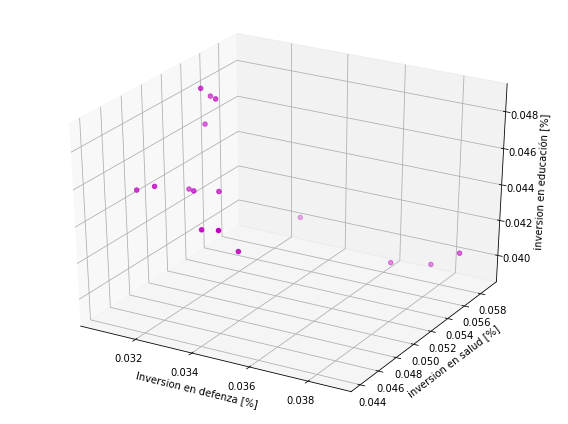

In [164]:
fig=plt.figure(figsize=(8,6))
axes = plt.axes(projection="3d")
axes.scatter3D(mili,salu,edu,color="m")
#axes.set_title("3d Sactter plot in Matplotlib",fontsize=14,fontweight="bold")
axes.set_xlabel('Inversion en defenza [%]')
axes.set_ylabel('inversion en salud [%]')
axes.set_zlabel('inversion en educación [%]')

plt.tight_layout()
plt.show()

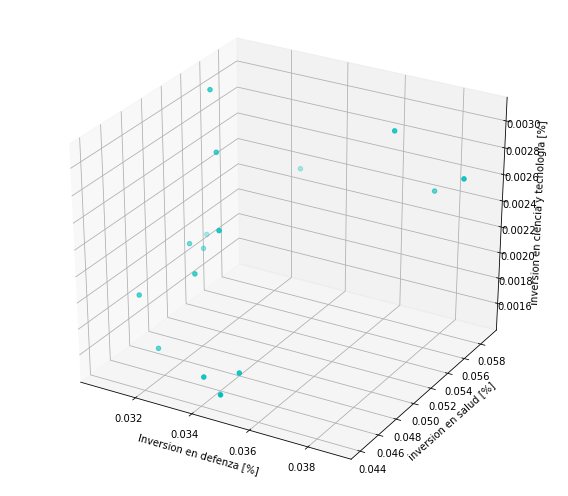

In [165]:
fig=plt.figure(figsize=(8,7))
axes = plt.axes(projection="3d")
axes.scatter3D(mili,salu,ct,color="c")
#axes.set_title("3d Sactter plot in Matplotlib",fontsize=14,fontweight="bold")
axes.set_xlabel('Inversion en defenza [%]')
axes.set_ylabel('inversion en salud [%]')
axes.set_zlabel('inversion en ciencia y tecnologia [%]')
plt.tight_layout()
plt.show()

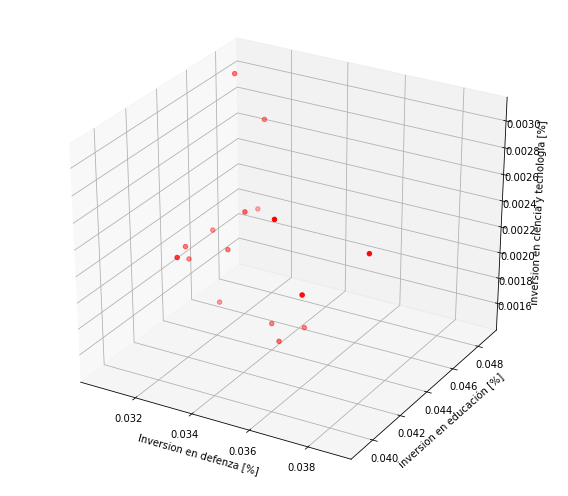

In [166]:
fig=plt.figure(figsize=(8,7))
axes = plt.axes(projection="3d")
axes.scatter3D(mili,edu,ct,color="r")
#axes.set_title("3d Sactter plot in Matplotlib",fontsize=14,fontweight="bold")
axes.set_xlabel('Inversion en defenza [%]')
axes.set_ylabel('inversion en educación [%]')
axes.set_zlabel('inversion en ciencia y tecnologia [%]')
plt.tight_layout()
plt.show()

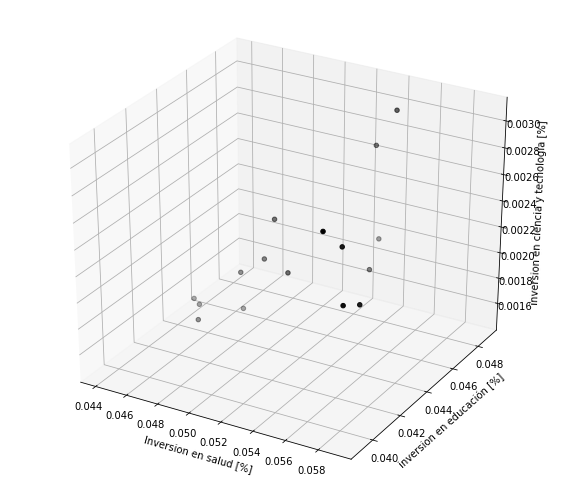

In [167]:
fig=plt.figure(figsize=(8,7))
axes = plt.axes(projection="3d")
axes.scatter3D(salu,edu,ct,color="k")
#axes.set_title("3d Sactter plot in Matplotlib",fontsize=14,fontweight="bold")
axes.set_xlabel('Inversion en salud [%]')
axes.set_ylabel('inversion en educación [%]')
axes.set_zlabel('inversion en ciencia y tecnologia [%]')
plt.tight_layout()
plt.show()